#  Homework 2: SQL
## Due: Monday, 19th February 2024, 11:59pm EST
### Worth 100 points in total

Welcome to Homework 2! By now, you should be familiar with the world of data science and the Pandas library. This assignment focuses on helping you get to grips with a new tool: SQL.

Through this homework, we will be working with SQL (specifically **pandasql**) by exploring a [Indego](https://www.rideindego.com/) dataset containing bike rides, stations and weather data. We will also conduct some text analysis of reataurant reviews in Philly.

 <!-- We will finish off the homework with some text analysis. -->

We are introducing a lot of new things in this homework, and this is often where students start to get lost. Thus, we **strongly** encourage you to review the slides/material as you work through this assignment.

**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the pinned FAQ post on Ed for updates! If you have been stuck, chances are other students have also faced similar problems.

# <ins> Note</ins>: this has historically been the _**MOST  difficult**_ HW out of all of them, so please watch the SQL recitation and **start early**!

## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [513]:
'''
!pip3 install penngrader-client
!pip install sqlalchemy==1.4.46
!pip install pandasql
!pip install geopy
!pip install -U kaleido'''

'\n!pip3 install penngrader-client\n!pip install sqlalchemy==1.4.46\n!pip install pandasql\n!pip install geopy\n!pip install -U kaleido'

In [514]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import geopy.distance as gp
import matplotlib.image as mpimg
import plotly.express as px
# import re
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud

import matplotlib.pyplot as plt
# from collections import Counter
# import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [515]:
# Three datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/indego_trips.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/indego_stations.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/weather_2022_PHL.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/restaurant_reviews.csv

File ‘indego_trips.csv’ already there; not retrieving.

File ‘indego_stations.csv’ already there; not retrieving.

File ‘weather_2022_PHL.csv’ already there; not retrieving.

File ‘restaurant_reviews.csv’ already there; not retrieving.



### Grader Setup

In [516]:
# ENSURE YOUR ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW
# TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 12345678                                                           # YOUR ID GOES HERE AS AN INTEGER #


################################################################################
# Check (no need to modify below - we're checking if you changed the ID above)
if STUDENT_ID == 12345678:
   print("Hold up!!! \nHold up!!!!! \nHold up!!!!!!!! \n \nWe can't store your grade if you forgot to change the ID!")

SECRET = STUDENT_ID

Hold up!!! 
Hold up!!!!! 
Hold up!!!!!!!! 
 
We can't store your grade if you forgot to change the ID!


In [517]:
%%writefile config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting config.yaml


In [518]:
grader = PennGrader('config.yaml', 'cis5450O_S24_HW2', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 12345678

Make sure this correct or we will not be able to store your grade




# Biking

<br>
<center><img src = "https://whyy.org/wp-content/uploads/2021/11/AP-indego-bike-share-philly-docking-station-110421-768x512.jpg" width= "500" align ="center"/></center>
<br>

I'm sure in your time so far you've come across these blue bikes and stations. Indego is the company responsible for this bike sharing ride system, and they make data on bike trips available to the public. This data can not only be useful to get information of how people in Philly use bikes, but it can give information on the most visited places in the city which can be useful for city planners and business owners.


In this homework, we'll be exploring some data about bikes including:

*   Trips: data about bike trips during the first week of October 2022.

*   Stations: data about bike stations, their ID and Name.

*   Weather: data about the weather in Philadelphia during 2022.


We'll be parsing this data into dataframes and relations, and then exploring how to query and assemble the tables into results. We will primarily be using PandaSQL, but for some of the initial questions, we will ask you to perform the same operations in Pandas as well, so as to familiarize you with the differences and similarities of the two.

For the final part of this Homework, we'll use a fourth database with restaurants and reviews, and perform some text analysis.

## Part 1: Load & Process our Datasets [15 points total]

Before we get into the data, we first need to load and clean our datasets.

# Metadata
You'll be working with four CSV files:
- `indego_trips.csv`: contains data about each trip, like the origin station, destination station and duration.
- `indego_stations.csv`: includes information about stations and their status in January 2023.
- `weather_2022_PHL.csv`: has one row per day during 2022 and shows weather information.
- `restaurant_reviews.csv`: has several reviews about three restaurants.

**TO-DO**:
* Load `indego_trips.csv` and save the data to a dataframe called `trips_df`.
* Load `indego_stations.csv` and save the data to a dataframe called `stations_df`.
* Load `weather_2022_PHL.csv` and save the data to a dataframe called `weather_df`.
* Load `restaurant_reviews.csv` and save the data to a dataframe called `reviews_df`.

In [519]:
# TODO: Import the 4 datasets to pandas dataframes -- make sure the dataframes are named correctly!
trips_df = pd.read_csv("indego_trips.csv")
stations_df = pd.read_csv("indego_stations.csv")
weather_df = pd.read_csv("weather_2022_PHL.csv")
reviews_df = pd.read_csv("restaurant_reviews.csv")


In [520]:
# TODO: view `trips_df` (just the first 5 rows with .head() is fine) to make sure the import was successful
trips_df.head()


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,536547052,9,10/1/2022 0:00,10/1/2022 0:09,3190.0,39.948921,-75.169907,3158.0,39.925522,-75.169037,23553,30.0,One Way,Indego30,electric
1,536547050,19,10/1/2022 0:01,10/1/2022 0:20,3168.0,39.951340,-75.173943,3034.0,39.933151,-75.162483,22190,30.0,One Way,Indego30,electric
2,536547048,12,10/1/2022 0:02,10/1/2022 0:14,3190.0,39.948921,-75.169907,3158.0,39.925522,-75.169037,18789,30.0,One Way,Indego30,electric
3,536547046,5,10/1/2022 0:03,10/1/2022 0:08,3075.0,39.967178,-75.161247,3039.0,39.971569,-75.159927,23383,30.0,One Way,Indego30,electric
4,536547044,11,10/1/2022 0:03,10/1/2022 0:14,3050.0,39.953388,-75.154259,3075.0,39.967178,-75.161247,5367,30.0,One Way,Indego30,standard


In [521]:
# TODO: view `stations_df` (just the first 5 rows with .head() is fine)to make sure the import was successful

stations_df.head()

,station_id,station_name,day_of_go_live_date,status,zone
0,3000,Virtual Station,4/23/2015,Active,0
1,3004,Municipal Services Building Plaza,4/23/2015,Active,0
2,3005,"Welcome Park, NPS",4/23/2015,Active,0
3,3006,40th & Spruce,4/23/2015,Active,2
4,3007,"11th & Pine, Kahn Park",4/23/2015,Active,0


In [522]:
# TODO: view `weather_df` (just the first 5 rows with .head() is fine)to make sure the import was successful
weather_df.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,1/1/2022,35,28,42,27,41,4,64,1881,2005,0.00,0.09,1.60
1,1/2/2022,37,29,44,26,41,7,67,1968,1876,0.00,0.10,1.68
2,1/3/2022,36,28,44,26,41,-3,63,1879,2000,0.72,0.09,1.50
3,1/4/2022,50,42,58,26,41,2,68,1918,1950,0.37,0.10,1.51
4,1/5/2022,37,24,50,26,40,-2,66,1904,1997,0.00,0.10,2.24


In [523]:
# TODO: view `reviews_df` (just the first 5 rows with .head() is fine)to make sure the import was successful
reviews_df.head()

,restaurant,review,zone
0,Gloria Restaurant,Today is the third time I've come to Gloria Re...,1
1,Gloria Restaurant,I have been to Gloria Restaurant a couple time...,1
2,Gloria Restaurant,Last Saturday I went to this restaurant hoping...,1
3,Gloria Restaurant,"First off, let me say I have never been to the...",1
4,Gloria Restaurant,I've been coming here for a while now and I wa...,1


### 1.1 Data Preprocessing

Next, we are going to want to clean up our dataframes, namely `trips_df` and `stations_df`, by

1.   Fixing columns
2.   Changing datatypes
3.   Handling nulls


First, let us view the first few rows of `trips_df`. You may also call `.info()` and additionally check the cardinality of each column to view the specifics of the dataframe. This is a good first step to take for Exploratory Data Analysis (EDA).

In [524]:
# view the .info() information for trips_df
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              15502 non-null  int64  
 1   duration             15502 non-null  int64  
 2   start_time           15502 non-null  object 
 3   end_time             15502 non-null  object 
 4   start_station        15477 non-null  float64
 5   start_lat            15477 non-null  float64
 6   start_lon            15477 non-null  float64
 7   end_station          15477 non-null  float64
 8   end_lat              15255 non-null  float64
 9   end_lon              15255 non-null  float64
 10  bike_id              15477 non-null  object 
 11  plan_duration        15477 non-null  float64
 12  trip_route_category  15477 non-null  object 
 13  passholder_type      15477 non-null  object 
 14  bike_type            15477 non-null  object 
dtypes: float64(7), int64(2), object(6)
m

#### 1.1.1 Cleaning `trips_df` (5 points)

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls, based on which we can now clean our dataframe.

Perform these steps and save results on a new dataframe: `trips_cleaned_df`

**TODO**:
* Drop the column `plan_duration`. We already have that information in the column `passholder_type`, which is more understandable.
* Drop the rows where `end_station` is 3000. This is a virtual station used for maintainance, and doesn't represent a real trip.
* Drop all rows with null values.
* Cast the columns:
  -  `start_time`, `end_time`, `trip_route_category`, `passholder_type`, `bike_type` as **string**. (Cast to 'string' and not 'str')
  - `bike_id` as **int**.
* Save results as `trips_cleaned_df` and sort it by `trip_id` ascending

After performing these steps, `trips_cleaned_df` should have the following schema:

**Final Schema**:
>trip_id | duration | start_time | end_time | start_station | start_lat | start_lon | end_station |  end_lat | end_lon |  bike_id | trip_route_category | passholder_type | bike_type
>--- | --- | --- |--- | --- | --- | --- |--- | --- | --- |--- |--- | --- | --- |

In [525]:
# TO-DO: drop the plan_duration column
trips_df.drop(columns=["plan_duration"], inplace=True)

In [526]:
# TO-DO: drop rows with end_station = 3000
trips_df = trips_df[trips_df["end_station"] != 3000]


In [527]:
# TO-DO: drop nulls
trips_df.dropna(inplace=True)

<ipython-input-527-3eae61ea3822>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_df.dropna(inplace=True)


In [528]:
# TO-DO: cast columns as indicated types
trips_df["start_time"] = trips_df["start_time"].astype(str)
trips_df["end_time"] = trips_df["end_time"].astype(str)
trips_df["trip_route_category"] = trips_df["trip_route_category"].astype(str)
trips_df["passholder_type"] = trips_df["passholder_type"].astype(str)
trips_df["bike_type"] = trips_df["bike_type"].astype(str)
trips_df["bike_id"] = trips_df["bike_id"].astype(int)

<ipython-input-528-44219497d634>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_df["start_time"] = trips_df["start_time"].astype(str)
<ipython-input-528-44219497d634>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_df["end_time"] = trips_df["end_time"].astype(str)
<ipython-input-528-44219497d634>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [529]:
# Sort by trip_id ascending
trips_df.sort_values(by="trip_id", ascending=True, inplace=True)


<ipython-input-529-23c99392645b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_df.sort_values(by="trip_id", ascending=True, inplace=True)


In [530]:
#TO-DO: save changes to trips_cleaned_df that is sorted by 'trip_id'
# Display the first few rows of cleaned trips_df
print("\nCleaned trips_df:")
print(trips_df.head())


Cleaned trips_df:
      trip_id  duration      start_time        end_time  start_station  \
68  536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
67  536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
66  536546927         7  10/1/2022 1:48  10/1/2022 1:55         3010.0   
65  536546929         7  10/1/2022 1:48  10/1/2022 1:55         3010.0   
63  536546932         6  10/1/2022 1:41  10/1/2022 1:47         3004.0   

    start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
68  39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
67  39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
66  39.947109 -75.166183       3064.0  39.938400 -75.173271    14655   
65  39.947109 -75.166183       3064.0  39.938400 -75.173271    12987   
63  39.953781 -75.163742       3206.0  39.951740 -75.170631    22554   

   trip_route_category passholder_type bike_type  
68          Round Trip        Indego30  standard  
6

In [531]:
# Save the cleaned datasets as CSV files
trips_df.to_csv("trips_cleaned.csv", index=False)

In [532]:
trips_cleaned_df = pd.read_csv('/content/trips_cleaned.csv')
# 5 points
grader.grade(test_case_id = 'test_cleaning_trips', answer = [len(trips_cleaned_df), trips_cleaned_df.head().reset_index(drop=True)])


You earned 4/5 points.

Please confirm your column types are correct.
Don't worry, you can re-submit and we will keep only your latest score.


#### 1.1.2 Processing Stations (5 points)

`stations_df` contains information on Indego stations across the city. We will clean this df by removing Inactive stations and stations created after October 2022.

Perform these steps and assign the cleaned dataframe to `stations_cleaned_df`.

**TODO**:
* **Cast** column `day_of_go_live_date` as datetime64[ns].
* **Drop** the stations that were created **after 10/7/2022** (i.e. we want to keep the ones on or before 10/7/2022)
* **Drop** the stations that have an **Inactive** status.
* **Drop** the columns `day_of_go_live_date` and `status`
* **Create** a new column called `is_west_philly` that is True if zone is 2 or 3 and False otherwise.
* **Save** the resulting dataframe as `stations_cleaned_df`, and sort it by `station_id` ascending


After performing these steps, `stations_cleaned_df` should have the following schema:

**Final Schema**:
>station_id | station_name | zone | is_west_philly
>--- | --- | --- |--- |

In [533]:
# TO-DO: Your code goes below. We recommend creating code comments for each of the bullets above (like we did for you in 1.1.1)
# Data preprocessing for stations_df
# Cast column day_of_go_live_date as datetime64[ns]
stations_df["day_of_go_live_date"] = pd.to_datetime(stations_df["day_of_go_live_date"])

# Drop stations created after 10/7/2022
stations_df = stations_df[stations_df["day_of_go_live_date"] <= "2022-10-07"]

# Drop stations with an Inactive status
stations_df = stations_df[stations_df["status"] == "Active"]

# Drop columns day_of_go_live_date and status
stations_df.drop(columns=["day_of_go_live_date", "status"], inplace=True)

# Create a new column is_west_philly
stations_df["is_west_philly"] = stations_df["zone"].isin([2, 3])

# Sort by station_id ascending
stations_df.sort_values(by="station_id", ascending=True, inplace=True)

# Display the first few rows of cleaned stations_df
print("\nCleaned stations_df:")
print(stations_df.head())
stations_df.to_csv("stations_cleaned.csv", index=False)


Cleaned stations_df:
   station_id                       station_name  zone  is_west_philly
0        3000                    Virtual Station     0           False
1        3004  Municipal Services Building Plaza     0           False
2        3005                  Welcome Park, NPS     0           False
3        3006                      40th & Spruce     2            True
4        3007             11th & Pine, Kahn Park     0           False


In [534]:
stations_cleaned_df = pd.read_csv("/content/stations_cleaned.csv")
# 5 points
grader.grade(test_case_id = 'test_stations_processing', answer = (len(stations_cleaned_df), stations_cleaned_df.head().reset_index(drop=True)))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3 Cleaning the weather (5 points)
Then, let's clean `weather_df` and make it usable.

In [535]:
# view .info() of weather_df to sense check it
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   365 non-null    object 
 1   actual_mean_temp       365 non-null    int64  
 2   actual_min_temp        365 non-null    int64  
 3   actual_max_temp        365 non-null    int64  
 4   average_min_temp       365 non-null    int64  
 5   average_max_temp       365 non-null    int64  
 6   record_min_temp        365 non-null    int64  
 7   record_max_temp        365 non-null    int64  
 8   record_min_temp_year   365 non-null    int64  
 9   record_max_temp_year   365 non-null    int64  
 10  actual_precipitation   365 non-null    float64
 11  average_precipitation  365 non-null    float64
 12  record_precipitation   365 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 37.2+ KB



**TO-DO**:
* Create `weather_cleaned_df` and only keep the following 5 columns:
     * `date`, `actual_mean_temp`, `actual_min_temp`, `actual_max_temp`, `actual_precipitation`
* Convert column `date` into type `datetime64[ns]`.
* Keep only the rows from 9/1/2022 to 10/31/2022, inclusive.
* Sort by column `date` descending.

After performing these steps, `weather_cleaned_df` should have the following schema:

**Final Schema**:
>date | actual_mean_temp | actual_min_temp | actual_max_temp | actual_precipitation
>--- | --- | --- |--- |--- |

In [536]:
#TO-DO: clean up the weather_df

# Data preprocessing for weather_df
# Keep only the required columns
weather_cleaned_df = weather_df[["date", "actual_mean_temp", "actual_min_temp", "actual_max_temp", "actual_precipitation"]]

# Convert column date into type datetime64[ns]
weather_cleaned_df = weather_cleaned_df.copy()
weather_cleaned_df["date"] = pd.to_datetime(weather_cleaned_df["date"])

# Keep only the rows from 9/1/2022 to 10/31/2022, inclusive
weather_cleaned_df = weather_cleaned_df[(weather_cleaned_df["date"] >= "2022-09-01") & (weather_cleaned_df["date"] <= "2022-10-31")]

# Sort by column date descending
weather_cleaned_df.sort_values(by="date", ascending=False, inplace=True)

# Display the first few rows of cleaned weather_cleaned_df
print("\nCleaned weather_cleaned_df:")
print(weather_cleaned_df.head())
weather_cleaned_df.to_csv("weather_cleaned.csv", index=False)
#reviews_df.to_csv("reviews_cleaned.csv", index=False)


Cleaned weather_cleaned_df:
          date  actual_mean_temp  actual_min_temp  actual_max_temp  \
303 2022-10-31                47               40               54   
302 2022-10-30                53               45               60   
301 2022-10-29                60               50               70   
300 2022-10-28                63               49               76   
299 2022-10-27                57               46               67   

     actual_precipitation  
303                  0.00  
302                  0.00  
301                  0.03  
300                  0.00  
299                  0.00  


In [537]:
# 5 points
grader.grade(test_case_id = 'test_cleaning_weather', answer = [len(weather_cleaned_df),weather_cleaned_df.head().reset_index(drop=True)])

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2 Your Sandbox

`.info()` is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just jump in, but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [538]:
# Your EDA here! Feel free to add more cells
import pandas as pd

# List of CSV files
files = ['trips_cleaned.csv', 'stations_cleaned.csv', 'reviews_cleaned.csv']

for file in files:
    print(f"EDA for {file}:\n")

    # Load the data
    df = pd.read_csv(file)

    # Display the first few rows
    print("First few rows:")
    print(df.head())
    print("\n")

    # Display summary statistics
    print("Summary statistics:")
    print(df.describe())
    print("\n")

    # Display unique values for each column
    print("Unique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    print("\n")


EDA for trips_cleaned.csv:

First few rows:
     trip_id  duration      start_time        end_time  start_station  \
0  536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
1  536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
2  536546927         7  10/1/2022 1:48  10/1/2022 1:55         3010.0   
3  536546929         7  10/1/2022 1:48  10/1/2022 1:55         3010.0   
4  536546932         6  10/1/2022 1:41  10/1/2022 1:47         3004.0   

   start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
0  39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
1  39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
2  39.947109 -75.166183       3064.0  39.938400 -75.173271    14655   
3  39.947109 -75.166183       3064.0  39.938400 -75.173271    12987   
4  39.953781 -75.163742       3206.0  39.951740 -75.170631    22554   

  trip_route_category passholder_type bike_type  
0          Round Trip        Indego30  s

## Part 2: Exploring the Data with PandasSQL (and Pandas) [68 points total]

Now that you are familiar (or still unfamiliar) with the dataset, we will now introduce you to SQL, or more specifically **pandasql**: a package created to allow users to query pandas DataFrames with SQL statements.

## 👇👇👇 IMPORTANT: Pay VERY CLOSE attention to this style guide! 👇👇👇

The typical flow to use pandasql (aliased as `ps`) is as follows:
1. Write a SQL query in the form of a string
    - **String Syntax:** use triple quotes `"""<your query>"""` to write multi-line strings in Python
    - **Aliases are your friend:** if there are very long table names or you find yourself needed to declare the source (common during join tasks), it's almost always optimal to alias your tables with short INTUITIVE alias names
    - **New Clauses New Line:** each of the main SQL clauses (`SELECT`, `FROM`, `WHERE`, etc.) should begin on a new line
    - **Use Indentation:** if there are many components for a single clause, separate them out with new <ins>indented</ins> lines.

    Example below:
    ```SQL
    """
    SELECT ltn.some_id, SUM(stn.some_value) AS total
    FROM long_table_name AS ltn
         INNER JOIN short_table_name AS stn
            ON ltn.common_key = stn.common_key
         INNER JOIN med_table_name AS mtn
            ON ltn.other_key = mtn.other_key
    WHERE ltn.col1 > value
         AND stn.col2 <= another_value
         AND mtn.col3 != something_else
    GROUP BY ltn.some_id
    ORDER BY total DESC
    """
    ```
2. Run the query using `ps.sqldf(your_query, locals())`

Pandasql is convenient in that it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `trips_cleaned_df`, `stations_cleaned_df` and `weather__cleaned_df` that you have created above!

Given that it is a brand new language, we wanted to give you a chance to directly compare the similarities/differences of the pandas that you already know and the SQL that you are about to learn. Thus, for each of the simpler queries, we may ask that you **look into the question twice: once with pandas and once with pandasql**.

### 2.1 One Way vs Round Trip [22 points]

#### 2.1.1 How many of the rides taken were Round Trip journeys? (5 points)

The dataframe `trips_cleaned_df` contains information for each ride. We want to know which of these rides were Round Trip journeys, and how many such rides were taken.

**TO-DO:**

*    Using what you learned in EDA in 1.2, use `pandas` to filter on the appropriate column to obtain only round trips, and save it to a DataFrame called `round_df`, which is sorted by `trip_id` in ascending order.
*   Save the number of rides in the integer variable `number_of_rounds`.

In [539]:
# TO-DO: Use pandas to obtain rides that were round trip
import pandas as pd
from sqlalchemy import create_engine
import pandasql as ps

trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

round_df = trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"]
round_df.sort_values(by="trip_id", ascending=True, inplace=True)
number_of_rounds = len(round_df)

print("\nRound Trips DataFrame:")
print(round_df.head())
print("\nNumber of Round Trips:", number_of_rounds)

avg_round_pd = round_df['duration'].mean()
print("\nAverage Round Trip Duration (Pandas):", avg_round_pd)

engine = create_engine("sqlite:///round_trip.db", echo=False)

try:
    with engine.connect() as connection:
        round_df.to_sql("round_df", con=connection, if_exists="replace", index=False)

    result = engine.execute("SELECT COUNT(*) AS num FROM round_df").fetchall()
    print("\nRound Trips Count (SQLAlchemy):", result[0][0])

    avg_dur_query = """
                     SELECT AVG(duration) AS avg_dur
                     FROM round_df
                    """
    avg_round_df = ps.sqldf(avg_dur_query, locals())
    print("\nAverage Round Trip Duration (pandasql):")
    print(avg_round_df)

except Exception as e:
    print("Error occurred:", e)


Round Trips DataFrame:
      trip_id  duration      start_time        end_time  start_station  \
0   536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
1   536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
25  536546974         7  10/1/2022 0:42  10/1/2022 0:49         3207.0   
30  536546984         4  10/1/2022 0:37  10/1/2022 0:41         3210.0   
38  536547000        26  10/1/2022 0:30  10/1/2022 0:56         3064.0   

    start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
0   39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
1   39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
25  39.954411 -75.192001       3207.0  39.954411 -75.192001     3612   
30  39.984921 -75.156677       3210.0  39.984921 -75.156677    22393   
38  39.938400 -75.173271       3064.0  39.938400 -75.173271     2441   

   trip_route_category passholder_type bike_type  
0           Round Trip        Indego30  standar

<ipython-input-539-956297160680>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_df.sort_values(by="trip_id", ascending=True, inplace=True)


In [540]:
# TO-DO : Save the number of round trip rides obtained from round_df to number_of_rounds
import pandas as pd
from sqlalchemy import create_engine
import pandasql as ps

trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

round_df = trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"]
round_df.sort_values(by="trip_id", ascending=True, inplace=True)
number_of_rounds = len(round_df)

print("\nRound Trips DataFrame:")
print(round_df.head())
print("\nNumber of Round Trips:", number_of_rounds)


Round Trips DataFrame:
      trip_id  duration      start_time        end_time  start_station  \
0   536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
1   536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
25  536546974         7  10/1/2022 0:42  10/1/2022 0:49         3207.0   
30  536546984         4  10/1/2022 0:37  10/1/2022 0:41         3210.0   
38  536547000        26  10/1/2022 0:30  10/1/2022 0:56         3064.0   

    start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
0   39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
1   39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
25  39.954411 -75.192001       3207.0  39.954411 -75.192001     3612   
30  39.984921 -75.156677       3210.0  39.984921 -75.156677    22393   
38  39.938400 -75.173271       3064.0  39.938400 -75.173271     2441   

   trip_route_category passholder_type bike_type  
0           Round Trip        Indego30  standar

<ipython-input-540-bea4c7911e54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_df.sort_values(by="trip_id", ascending=True, inplace=True)


In [541]:
# 3 points
grader.grade(test_case_id = 'test_round', answer = (round_df.reset_index(drop=True), number_of_rounds))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TO-DO:** Now using **pandasql**, calculate the number of round trips in trips_cleaned_df and save it to the dataframe `round_df_sql`, with the column named `num`. This will be a rather unconventional 1x1 dataframe, but that's OK.

**Final Schema:**

> num|
> --- |

In [542]:
# TODO: Use pandasql to calculate the number of round trips
import pandas as pd
from sqlalchemy import create_engine
import pandasql as ps

trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

round_df = trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"]
round_df.sort_values(by="trip_id", ascending=True, inplace=True)
number_of_rounds = len(round_df)

print("\nRound Trips DataFrame:")
print(round_df.head())
print("\nNumber of Round Trips:", number_of_rounds)


Round Trips DataFrame:
      trip_id  duration      start_time        end_time  start_station  \
0   536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
1   536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
25  536546974         7  10/1/2022 0:42  10/1/2022 0:49         3207.0   
30  536546984         4  10/1/2022 0:37  10/1/2022 0:41         3210.0   
38  536547000        26  10/1/2022 0:30  10/1/2022 0:56         3064.0   

    start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
0   39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
1   39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
25  39.954411 -75.192001       3207.0  39.954411 -75.192001     3612   
30  39.984921 -75.156677       3210.0  39.984921 -75.156677    22393   
38  39.938400 -75.173271       3064.0  39.938400 -75.173271     2441   

   trip_route_category passholder_type bike_type  
0           Round Trip        Indego30  standar

<ipython-input-542-560357e522fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_df.sort_values(by="trip_id", ascending=True, inplace=True)


In [543]:
# Write the SQL query
query = """
SELECT COUNT(*) as num
FROM trips_cleaned_df
WHERE trip_route_category = 'Round Trip'
"""

# Execute the query
round_df_sql = ps.sqldf(query)

# Print the result
print("\nNumber of Round Trips:", round_df_sql['num'][0])



Number of Round Trips: 930


In [544]:
# Grade the results
grader.grade(test_case_id = 'test_round_sql', answer = round_df_sql)


Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 What was the duration of these round trips? [5 points]

The dataframe `round_df` contains information for each ride that was a round trip. We want to know the average duration of the trip for all these rides.

**TO-DO:** Using **pandas**, calculate the average duration of the rides in `round_df` and save it to the variable `avg_round_pd`. Please make sure you do NOT cast it to any type explicitly nor should you round it.





In [545]:
#!pip install penngrader


In [546]:
# TODO: Use pandas to calculate the average duration of round trips
import pandas as pd
from sqlalchemy import create_engine
import pandasql as ps

trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

round_df = trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"]
round_df.sort_values(by="trip_id", ascending=True, inplace=True)
number_of_rounds = len(round_df)

print("\nRound Trips DataFrame:")
print(round_df.head())
print("\nNumber of Round Trips:", number_of_rounds)

avg_round_pd = round_df['duration'].mean()
print("\nAverage Round Trip Duration (Pandas):", avg_round_pd)

engine = create_engine("sqlite:///round_trip.db", echo=False)

try:
    with engine.connect() as connection:
        round_df.to_sql("round_df", con=connection, if_exists="replace", index=False)

    result = engine.execute("SELECT COUNT(*) AS num FROM round_df").fetchall()
    print("\nRound Trips Count (SQLAlchemy):", result[0][0])

    avg_dur_query = """
                     SELECT AVG(duration) AS avg_dur
                     FROM round_df
                    """
    avg_round_df = ps.sqldf(avg_dur_query, locals())
    print("\nAverage Round Trip Duration (pandasql):")
    print(avg_round_df)

except Exception as e:
    print("Error occurred:", e)


Round Trips DataFrame:
      trip_id  duration      start_time        end_time  start_station  \
0   536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
1   536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
25  536546974         7  10/1/2022 0:42  10/1/2022 0:49         3207.0   
30  536546984         4  10/1/2022 0:37  10/1/2022 0:41         3210.0   
38  536547000        26  10/1/2022 0:30  10/1/2022 0:56         3064.0   

    start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
0   39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
1   39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
25  39.954411 -75.192001       3207.0  39.954411 -75.192001     3612   
30  39.984921 -75.156677       3210.0  39.984921 -75.156677    22393   
38  39.938400 -75.173271       3064.0  39.938400 -75.173271     2441   

   trip_route_category passholder_type bike_type  
0           Round Trip        Indego30  standar

<ipython-input-546-969c0a43cdd1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_df.sort_values(by="trip_id", ascending=True, inplace=True)


In [547]:
# 2 points
grader.grade(test_case_id = 'test_round_dur_pd', answer = avg_round_pd)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TO-DO:** Using **pandasql**, calculate the average duration of the rides in round_df and save it to the dataframe `avg_round_df`, with the column named `avg_dur`. Please make sure you do NOT cast it to any type explicitly nor should you round it.

Again, this will be a 1x1 dataframe but that's OK.

**Final Schema:**


> avg_dur |
> --- |

In [548]:
# TODO: Use pandasql to calculate the average duration of round trips
import pandas as pd
from sqlalchemy import create_engine
import pandasql as ps

trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

round_df = trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"]
round_df.sort_values(by="trip_id", ascending=True, inplace=True)
number_of_rounds = len(round_df)

print("\nRound Trips DataFrame:")
print(round_df.head())
print("\nNumber of Round Trips:", number_of_rounds)

avg_round_pd = round_df['duration'].mean()
print("\nAverage Round Trip Duration (Pandas):", avg_round_pd)



Round Trips DataFrame:
      trip_id  duration      start_time        end_time  start_station  \
0   536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
1   536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
25  536546974         7  10/1/2022 0:42  10/1/2022 0:49         3207.0   
30  536546984         4  10/1/2022 0:37  10/1/2022 0:41         3210.0   
38  536547000        26  10/1/2022 0:30  10/1/2022 0:56         3064.0   

    start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
0   39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
1   39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
25  39.954411 -75.192001       3207.0  39.954411 -75.192001     3612   
30  39.984921 -75.156677       3210.0  39.984921 -75.156677    22393   
38  39.938400 -75.173271       3064.0  39.938400 -75.173271     2441   

   trip_route_category passholder_type bike_type  
0           Round Trip        Indego30  standar

<ipython-input-548-be74e06a1b93>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_df.sort_values(by="trip_id", ascending=True, inplace=True)


In [549]:
# 3 points
grader.grade(test_case_id = 'test_round_dur', answer = avg_round_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.3 How long do you take? (6 points)

Some of the rides listed in the `trips_cleaned_df` are marked as Day Pass. We'd like to know how long riders take their bikes out when they get a Day Pass.

**TO-DO:** Using **pandas**, and what you learned in EDA in 1.2, use a filter on the appropriate column to obtain only “Day Pass” to calculate the average duration of these trips from `trips_cleaned_df` and save it to the variable `day_df_pd`. Please make sure you do not cast it to any type explicitly, or round it.  

**Final Schema:**

> avg_dur |
> --- |

Please use only `trips_cleaned_df` for both `pandas` and `pandasql`.

In [550]:
# TODO: Use pandas to calculate the average duration of trips with a day pass
import pandas as pd
from sqlalchemy import create_engine
import pandasql as ps

trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

round_df = trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"]
round_df.sort_values(by="trip_id", ascending=True, inplace=True)
number_of_rounds = len(round_df)

print("\nRound Trips DataFrame:")
print(round_df.head())
print("\nNumber of Round Trips:", number_of_rounds)

avg_round_pd = round_df['duration'].mean()
print("\nAverage Round Trip Duration (Pandas):", avg_round_pd)

engine = create_engine("sqlite:///round_trip.db", echo=False)

try:
    with engine.connect() as connection:
        round_df.to_sql("round_df", con=connection, if_exists="replace", index=False)

    result = engine.execute("SELECT COUNT(*) AS num FROM round_df").fetchall()
    print("\nRound Trips Count (SQLAlchemy):", result[0][0])

    avg_dur_query = """
                     SELECT AVG(duration) AS avg_dur
                     FROM round_df
                    """
    avg_round_df = ps.sqldf(avg_dur_query, locals())
    print("\nAverage Round Trip Duration (pandasql):")
    print(avg_round_df)

except Exception as e:
    print("Error occurred:", e)


Round Trips DataFrame:
      trip_id  duration      start_time        end_time  start_station  \
0   536546924         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
1   536546925         3  10/1/2022 1:50  10/1/2022 1:53         3188.0   
25  536546974         7  10/1/2022 0:42  10/1/2022 0:49         3207.0   
30  536546984         4  10/1/2022 0:37  10/1/2022 0:41         3210.0   
38  536547000        26  10/1/2022 0:30  10/1/2022 0:56         3064.0   

    start_lat  start_lon  end_station    end_lat    end_lon  bike_id  \
0   39.904709 -75.173401       3188.0  39.904709 -75.173401    11708   
1   39.904709 -75.173401       3188.0  39.904709 -75.173401     3483   
25  39.954411 -75.192001       3207.0  39.954411 -75.192001     3612   
30  39.984921 -75.156677       3210.0  39.984921 -75.156677    22393   
38  39.938400 -75.173271       3064.0  39.938400 -75.173271     2441   

   trip_route_category passholder_type bike_type  
0           Round Trip        Indego30  standar

<ipython-input-550-cbc486fcab04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_df.sort_values(by="trip_id", ascending=True, inplace=True)


**TO-DO:** Repeat the same using **pandasql** and save it as `day_df_sql` where the average duration column should be named `avg_dur`.

In [551]:
# TODO: Use pandasql to calculate the average duration of trips with a day pass
import pandas as pd
from sqlalchemy import create_engine

# Load cleaned trips dataframe
trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

# Use pandas to obtain rides that were day pass
day_df_pd = trips_cleaned_df[trips_cleaned_df["passholder_type"] == "Day Pass"]["duration"].mean()

# Displaying the pandas result
print("\nAverage Day Pass Duration (Pandas):", day_df_pd)

# Create SQLite engine
engine = create_engine("sqlite:///day_pass_duration.db", echo=False)

# Filter DataFrame for day pass rides
day_pass_df = trips_cleaned_df[trips_cleaned_df["passholder_type"] == "Day Pass"]

# Register DataFrame as table in the SQLite engine
day_pass_df.to_sql("day_pass_df", con=engine, if_exists="replace", index=False)

# Run a simple SQL query using SQLAlchemy
result = engine.execute("SELECT AVG(duration) AS avg_dur FROM day_pass_df").fetchall()

# Displaying the SQLAlchemy result
print("\nAverage Day Pass Duration (SQLAlchemy):", result[0][0])



Average Day Pass Duration (Pandas): 31.432989690721648

Average Day Pass Duration (SQLAlchemy): 31.432989690721648


In [552]:
import pandasql as ps

# Write the SQL query
query = """
SELECT AVG(duration) as avg_dur
FROM trips_cleaned_df
WHERE passholder_type = 'Day Pass'
"""

# Execute the query
day_df_sql = ps.sqldf(query)

# Print the result
print("\nAverage Day Pass Duration (pandasql):", day_df_sql['avg_dur'][0])



Average Day Pass Duration (pandasql): 31.432989690721648


In [553]:
# 5 points
# Grade the results
grader.grade(test_case_id = 'test_day_dur', answer = (day_df_sql, day_df_pd, query))


Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##### **Reflect:**  What do you think? (1 point)

Is there a difference between the average duration for round trips (2.1.2) and Day Pass journeys (2.1.3)? Please state your answer as Yes/No with a reason for the possible similarity/difference? [1 pt]



In [554]:
your_ans = """Yes"""

In [555]:
# Grader Cell for Text Response (do not modify) [1 point]
grader.grade(test_case_id = 'test_q', answer = your_ans)

You earned 0/1 points.

Please rethink your answer 
Don't worry, you can re-submit and we will keep only your latest score.


#### 2.1.4 Ratio of Rides (6 points)

Some of the rides listed in the `trips_cleaned_df` are marked as One Way while some are marked as Round Trip. We'd like to know the ratio between the number of one - way trips to the number of round-trip journeys.

**TO-DO:** Using **pandas**, calculate the ratio of the number of one-way rides to the number of round-trip rides from `trips_cleaned_df` and save it to the variable `ratio_1_round`

**HINT:** Let the answer remain a float value when using pandas.

In [556]:
# TO-DO: Use pandas to obtain the ratio of average number of one-way trips to average number of round-trip journeys
import pandas as pd
import pandasql as ps

# Load cleaned trips dataframe
trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

# Calculate the number of one-way trips
num_one_way_trips = len(trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "One Way"])

# Calculate the number of round-trip journeys
num_round_trips = len(trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"])

# Calculate the ratio of one-way trips to round-trip journeys
ratio_1_round = num_one_way_trips / num_round_trips

print("Ratio of One-Way Trips to Round-Trip Journeys (Pandas):", ratio_1_round)

# Using pandasql
ratio_query = """
              SELECT CAST(COUNT(CASE WHEN trip_route_category = 'One Way' THEN 1 END) AS FLOAT) /
              CAST(COUNT(CASE WHEN trip_route_category = 'Round Trip' THEN 1 END) AS FLOAT) AS ratio
              FROM trips_cleaned_df
              """

ratio_df = ps.sqldf(ratio_query, locals())

print("\nRatio of One-Way Trips to Round-Trip Journeys (Pandasql):")
print(ratio_df)


Ratio of One-Way Trips to Round-Trip Journeys (Pandas): 15.403225806451612

Ratio of One-Way Trips to Round-Trip Journeys (Pandasql):
       ratio
0  15.403226


In [557]:
# 2 points
grader.grade(test_case_id = 'test_ratio_pd', answer = ratio_1_round)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, let's try doing the same thing using pandasql, and see if the results match.

**TODO:** Using **pandasql**, calculate the ratio of the number of one-way rides to the number of round-trip rides from `trips_cleaned_df` and save it to the dataframe `ratio_df`, naming the column `'ratio'`.

Try to make use of subqueries here! Note, your results should be equivalent (to each other, and the answer, of course) if you have done both parts correctly.

**HINT:** Cast your ratio to `float` type.  

**Final Schema:**

> ratio |
> --- |

In [558]:
# TODO: Use pandasql to obtain the ratio of number of one-way trips to  number of round trips

import pandas as pd
import pandasql as ps

# Load cleaned trips dataframe
trips_cleaned_df = pd.read_csv("trips_cleaned.csv")

# Calculate the number of one-way trips
num_one_way_trips = len(trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "One Way"])

# Calculate the number of round-trip journeys
num_round_trips = len(trips_cleaned_df[trips_cleaned_df["trip_route_category"] == "Round Trip"])

# Calculate the ratio of one-way trips to round-trip journeys
ratio_1_round = num_one_way_trips / num_round_trips

print("Ratio of One-Way Trips to Round-Trip Journeys (Pandas):", ratio_1_round)

# Using pandasql
ratio_query = """
              SELECT CAST(COUNT(CASE WHEN trip_route_category = 'One Way' THEN 1 END) AS FLOAT) /
              CAST(COUNT(CASE WHEN trip_route_category = 'Round Trip' THEN 1 END) AS FLOAT) AS ratio
              FROM trips_cleaned_df
              """

ratio_df = ps.sqldf(ratio_query, locals())

print("\nRatio of One-Way Trips to Round-Trip Journeys (Pandasql):")
print(ratio_df)

Ratio of One-Way Trips to Round-Trip Journeys (Pandas): 15.403225806451612

Ratio of One-Way Trips to Round-Trip Journeys (Pandasql):
       ratio
0  15.403226


In [559]:
# 4 points
grader.grade(test_case_id = 'test_ratio_sql', answer = (ratio_df, ratio_query))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.2 Station Involvement [18 points]

#### 2.2.1 Names not numbers [6 points]
We will now use `stations_cleaned_df` to modify our `trips_final_df`. If you look at the rides data, you will notice that both start and end station columns have numbers corresponding to the station ID listed. Using the station ID listed in stations_df, we want to include station names instead of station IDs in our `trips_final_df`.

**TO-DO** (`pandas`):
* Drop records with missing values and update `trips_cleaned_df`
* Create a new dataframe called `trips_final_df` which you'll use after this question. Begin by assigning a **copy** of `trips_cleaned_df` to it.
  * **Hint:** Don't just set them equal right away! Refer to the ```.copy()``` function!
.
* Replace the IDs in the `'start_station'` column of `trips_final_df` with the corresponding station name.
* Replace the IDs in the `'end_station'` column of `trips_final_df` with the corresponding station name.
* If the any station ID cannot be mapped to a name, the name should be set to 'Unknown'
* Sort `trips_final_df` by the trip_id (in ascending order).



In [560]:
# TO-DO : Drop missing values
# Drop missing values from trips_cleaned_df
trips_cleaned_df.dropna(inplace=True)

In [561]:
# TO-DO : Create a copy named trips_final_df using .copy()
# Create a copy named trips_final_df using .copy()
trips_final_df = trips_cleaned_df.copy()

In [562]:
"""# TO-DO: Replace station IDs with station names in trips_final_df. Read ALL the bullets above carefully!
def station_id_to_name(station_id):
    # This function is not provided in the context.
    # You need to implement it based on your specific data and requirements.
    # For example, you could use fuzzy string matching to find the closest match in a list of known station names.
    pass
    trips_final_df["start_station"] = trips_final_df["start_station"].map(station_id_to_name).fillna("Unknown")
trips_final_df["end_station"] = trips_final_df["end_station"].map(station_id_to_name).fillna("Unknown")

def station_id_to_name(station_id):
       # Your specific implementation based on your data and requirements
       # For example, you could use fuzzy string matching to find the closest match in a list of known station names.
       pass

def station_id_to_name(station_id):
       if station_id is None:
           return "Unknown"
       # Your specific implementation based on your data and requirements
       # For example, you could use fuzzy string matching to find the closest match in a list of known station names.
       pass

# Ensure that the arguments are valid and expected
# Ensure that the arguments are valid and expected
trips_final_df["start_station"] = trips_final_df["start_station"].map(lambda station_id: station_id_to_name(station_id))
trips_final_df["end_station"] = trips_final_df["end_station"].map(lambda station_id: station_id_to_name(station_id))

!pip install uszipcode

from uszipcode import station_id_to_name

!pip show uszipcode

!pip install --upgrade uszipcode

from uszipcode import station_id_to_name

from uszipcode import ZipCode

from uszipcode import ZipCode

station_id_to_name = {
    "1": "Powell St BART Station (Market St at 5th St)",
    "2": "Civic Center BART Station (7th St at Market St)",
    "3": "Embarcadero BART Station (Beale St at Market St)",
    # ... and so on
}

def station_id_to_name(station_id):
    return station_id_to_name.get(station_id, "Unknown")

!pip install fuzzywuzzy
from fuzzywuzzy import fuzz"""

'# TO-DO: Replace station IDs with station names in trips_final_df. Read ALL the bullets above carefully!\ndef station_id_to_name(station_id):\n    # This function is not provided in the context.\n    # You need to implement it based on your specific data and requirements.\n    # For example, you could use fuzzy string matching to find the closest match in a list of known station names.\n    pass\n    trips_final_df["start_station"] = trips_final_df["start_station"].map(station_id_to_name).fillna("Unknown")\ntrips_final_df["end_station"] = trips_final_df["end_station"].map(station_id_to_name).fillna("Unknown")\n\ndef station_id_to_name(station_id):\n       # Your specific implementation based on your data and requirements\n       # For example, you could use fuzzy string matching to find the closest match in a list of known station names.\n       pass\n\ndef station_id_to_name(station_id):\n       if station_id is None:\n           return "Unknown"\n       # Your specific implementatio

In [563]:
# Define a dictionary to map station IDs to station names
station_names = {
    "1": "Powell St BART Station (Market St at 5th St)",
    "2": "Civic Center BART Station (7th St at Market St)",
    "3": "Embarcadero BART Station (Beale St at Market St)",
    # ... and so on
}

# Define a function to map station IDs to station names
def station_id_to_name(station_id):
    return station_names.get(station_id, "Unknown")

# Map station IDs to station names in the DataFrame
trips_final_df["start_station"] = trips_final_df["start_station"].map(station_id_to_name).fillna("Unknown")
trips_final_df["end_station"] = trips_final_df["end_station"].map(station_id_to_name).fillna("Unknown")


In [564]:
# TO-DO: Sort trips_final_df by the trip_id
trips_final_df.sort_values(by="trip_id", inplace=True)


In [565]:
# 3 points
grader.grade(test_case_id = 'test_stations', answer = trips_final_df.reset_index(drop=True))

You earned 2/3 points.

But, don't worry, you can re-submit and we will keep only your latest score.


**TO-DO** : Repeat the same using `trips_cleaned_df` (only for this sql query) and `pandasql`, saving it as `trips_stations_sql`.

<ins>Remember:</ins> If a station ID cannot be mapped to a name, the name should be **NULL**

In [566]:
#TODO : Use pandasql to replace station IDs with station names in trips_cleaned_df and save it as trips_stations_sql

replace_query = """
                SELECT
                    trip_id,
                    duration,
                    start_time,
                    end_time,
                    (CASE
                        WHEN s1.station_name IS NOT NULL THEN s1.station_name
                        ELSE 'Unknown'
                    END) AS start_station,
                    start_lat,
                    start_lon,
                    (CASE
                        WHEN s2.station_name IS NOT NULL THEN s2.station_name
                        ELSE 'Unknown'
                    END) AS end_station,
                    end_lat,
                    end_lon,
                    bike_id,
                    trip_route_category,
                    passholder_type,
                    bike_type
                FROM
                    trips_cleaned_df AS t
                LEFT JOIN
                    stations_cleaned_df AS s1 ON t.start_station = s1.station_id
                LEFT JOIN
                    stations_cleaned_df AS s2 ON t.end_station = s2.station_id
                """

trips_stations_sql = ps.sqldf(replace_query, locals())
trips_stations_sql

!ls

import pandas as pd

stations_cleaned_df = pd.read_csv('stations_cleaned.csv')


config.yaml	      indego_trips.csv	      sample_data	    weather_cleaned.csv
day_pass_duration.db  restaurant_reviews.csv  stations_cleaned.csv
drive		      reviews_cleaned.csv     trips_cleaned.csv
indego_stations.csv   round_trip.db	      weather_2022_PHL.csv


In [567]:
#3 points
grader.grade(test_case_id = 'test_stations_sql', answer = (trips_stations_sql, replace_query))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Morning Class? (6 points)
We are all pretty familiar with University City, most of you probably live in or commute to this area every day. We want to count the number of people who start out at the University City Station before noon.

**TO-DO**:
* The first step involved is creating a new column in `trips_final_df` called `hour` where you will extract the hour of the `start_time` column. You can do this using pandas, and an apply function.
* The next step is to use `pandasql` to count the number of rides that start at the 'University City Station' before noon (do not include trips with hour 12) and store the result in a dataframe called `ucity_df`, with the column name as `ride_count`.

**Hint**: you may find it helpful to look up the `.Timestamp()` function to understand how to extract the hour of a particular date.

In [568]:
#TODO : Create a new column called hour
trips_final_df['hour'] = pd.to_datetime(trips_final_df['start_time']).dt.hour


In [569]:

# Write the SQL query to count the number of rides before noon that started at University City Station
ucity_query = """
SELECT COUNT(*) AS ride_count
FROM trips_final_df
WHERE start_station = 'University City Station' AND hour < 12
"""

# Execute the query
ucity_df = ps.sqldf(ucity_query)

# Print the result
print("Number of rides starting at University City Station before noon:", ucity_df['ride_count'].values[0])


Number of rides starting at University City Station before noon: 0


In [570]:
#6 points
grader.grade(test_case_id = 'test_ucity', answer = (trips_final_df.reset_index(drop=True), ucity_df.reset_index(drop=True), ucity_query))

You earned 5/6 points.

Ride Count is incorrect 
Don't worry, you can re-submit and we will keep only your latest score.


#### 2.2.3 Most Popular Stations (6 points)
We now want to see which stations from `trips_final_df` are used most frequently.

**TODO**:
* Find the total number of rides for each `start_station`
* Return the top 3 most frequently used stations in a dataframe named `top3_df` where the schema looks like this:

> Station | Count_rides
> --- | ---

**Hint**: Use `pandasql` to do this in ONE query.

In [571]:
#TODO: Return the top three used stations by number of rides
# Import necessary libraries
import pandas as pd
import pandasql as ps

# Load the data
trips_cleaned_df = pd.read_csv("trips_cleaned.csv")  # replace with your actual DataFrame
stations_cleaned_df = pd.read_csv('stations_cleaned.csv')  # replace with your actual DataFrame

# Write the SQL query
replace_query = """
                SELECT
                    t.trip_id,
                    t.duration,
                    t.start_time,
                    t.end_time,
                    COALESCE(s1.station_name, 'Unknown') AS start_station,
                    t.start_lat,
                    t.start_lon,
                    COALESCE(s2.station_name, 'Unknown') AS end_station,
                    t.end_lat,
                    t.end_lon,
                    t.bike_id,
                    t.trip_route_category,
                    t.passholder_type,
                    t.bike_type
                FROM
                    trips_cleaned_df AS t
                LEFT JOIN
                    stations_cleaned_df AS s1 ON t.start_station = s1.station_id
                LEFT JOIN
                    stations_cleaned_df AS s2 ON t.end_station = s2.station_id
                """

# Execute the query
trips_stations_sql = ps.sqldf(replace_query)

# Print the result
#print(trips_stations_sql)
# Write the SQL query
top3_query = """
SELECT start_station AS Station, COUNT(*) AS Count_rides
FROM trips_stations_sql
GROUP BY start_station
ORDER BY Count_rides DESC
LIMIT 3
"""

# Execute the query
top3_df = ps.sqldf(top3_query)

# Print the result
print(top3_df)


           Station  Count_rides
0    17th & Locust          267
1  12th & Chestnut          238
2    15th & Spruce          233


In [572]:
# 6 points
grader.grade(test_case_id = 'test_freq_stat', answer = (top3_query,top3_df))


Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 Determining the Distance [8 points]

We are going to be using a new package called geopy to calculate the distance between the start and end stations for a particular ride.

`geopy` has been imported as `gp` above, and the `.geodesic()` gives you the distance between two sets of coordinates. We have the coordinates for the start_station and end_station for each ride.

**TO-DO**:
* For the trip with `'trip_id': 540422637`, find the latitude and longitudes of both the start and end stations.
* Save the latitude and longitude as **tuples** into variables `coords_1` and `coords_2` for the `'start_station'` and `'end_station'` respectively.
  - Do **NOT** hard code the values: you will get a **ZERO** for the question when we manually review for this!
* Use geopy to calculate the distance **in miles** between the two stations and save it to the variable final_dist.

In [573]:
# TO-DO: Use pandasql to obtain the latitude and longitude of the start and end stations for ride ID 540422637.
# Write the SQL query
latlng_query = """
SELECT start_lat, start_lon, end_lat, end_lon
FROM trips_final_df
WHERE trip_id = 540422637
"""

# Execute the query
latlng_df = ps.sqldf(latlng_query)

# Print the result
print(latlng_df)


   start_lat  start_lon    end_lat    end_lon
0  39.947109 -75.166183  39.927769 -75.151031


In [574]:
# TO-DO : Fill in the coordinates using the dataframe that has the resultant coordinates
# Get the coordinates from the DataFrame
coords_1 = (latlng_df['start_lat'][0], latlng_df['start_lon'][0])  # coordinates for the start station
coords_2 = (latlng_df['end_lat'][0], latlng_df['end_lon'][0])  # coordinates for the end station

print("Coordinates for the start station:", coords_1)
print("Coordinates for the end station:", coords_2)


Coordinates for the start station: (39.947109, -75.166183)
Coordinates for the end station: (39.927769, -75.151031)


In [575]:
# TO-DO: Use geopy and its appropriate functions to calculate the distance between the two stations
# Import necessary libraries
from geopy.distance import geodesic

# Calculate the distance between the two stations
final_dist = geodesic(coords_1, coords_2).miles

print("Distance between the two stations:", final_dist, "miles")


Distance between the two stations: 1.558201402042118 miles


In [576]:
# 8 points
grader.grade(test_case_id = 'test_geodist', answer = (coords_1, coords_2, final_dist, latlng_query))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [577]:
"""!pip install autograde

!pip install autograde


!jupyter nbconvert --execute lab09.ipynb


!pip install autograde

!jupyter nbconvert --execute lab01.ipynb

!pip show grader"""

'!pip install autograde\n\n!pip install autograde\n\n\n!jupyter nbconvert --execute lab09.ipynb\n\n\n!pip install autograde\n\n!jupyter nbconvert --execute lab01.ipynb\n\n!pip show grader'

### 2.4 Destinations from Amtrak Station [7 points]
As you might imagine, Amtrak Station is a very important location for Indego, as there is a lot of people that either want to get there for a train ride or are exiting from there to visit Philadelphia. Thus, we want to learn about where people tend to go once they leave Amtrak Station.

You will first create this dataset using Pandas, and then SQL (pandasql)

**TO-DO:**
- Using `trips_final_df`, find the top 5 most common end stations where Amtrak Station was the start_station where the duration is **at least 15 minutes**
  - Do **NOT** include Amtrak as an end station!
  - Note that duration is already measured in minutes, and that Amtrak's station_name is _"Amtrak 30th Street Station"_
- For this Pandas section, name the final dataframe `end_station_df`.
- Ensure that `end_station_df` is first sorted by `Count` in descending order, and then sorted by `end_station` in ascending order.

**Final Schema (make sure you have the same column names and order!)**:
> end_station | Count
> --- | ---

In [578]:
# TODO: Get end_station_df using Pandas
# Filter rows where duration is at least 15 minutes
filtered_df = trips_final_df[trips_final_df['duration'] >= 15]

# Group by end_station and count the number of rows for each end_station
end_station_counts = filtered_df['end_station'].value_counts()

# Convert the Series to a DataFrame and reset the index
end_station_df = end_station_counts.reset_index()

# Rename the columns
end_station_df.columns = ['end_station', 'Count']

# Get the top 5
end_station_df = end_station_df.head(5)


**TO-DO:**
- Repeat the process but now using pandasql. Please make sure to use `end_station_query` to save your SQL code as this is what will be graded.
- Name the final dataframe `sql_end_station_df`
- Double-check that this looks the exact same as `end_station_df` from the Pandas section above.

**Final Schema:**
> end_station | Count
> --- | ---

In [579]:
# TODO: Get the same exact query, but only using PandaSQL

end_station_query = """
                    SELECT end_station, COUNT(*) as Count
                    FROM trips_final_df
                    WHERE duration >= 15 AND end_station != 'Amtrak 30th Street Station'
                    GROUP BY end_station
                    ORDER BY Count DESC, end_station ASC
                    LIMIT 5
                    """

sql_end_station_df = ps.sqldf(end_station_query, locals())


In [580]:
# 7 points
grader.grade(test_case_id = 'test_amtrak', answer = (end_station_df.reset_index(drop=True), sql_end_station_df, end_station_query))

You earned 4/7 points.

It seems like you have the incorrect number of stations
It seems like you have incorrect counts for end stations
It seems like you have the wrong end station names
Don't worry, you can re-submit and we will keep only your latest score.


### 2.5 Weather and Trip Data [13 points]

#### 2.5.1 Trips and Weather Tables [3 points]

We will begin by slightly modifying `trips_final_df` and `weather_cleaned_df`. We eventually want to merge using the `date` column from `weather_cleaned_df` and the `start_time` column from `trips_final_df`. You will note that these two columns do not contain the same information, since `date` does not contain the time.

**We are not concerned about the time, it is up to you to find the best way to alter the `start_time` column to keep just the date and thus make merging possible**.

We strongly recommend creating a new `date` column in `trips_final_df` containing only the day information, as it will make merging the dataframes much easier.

**TO-DO:** \\
- `weather_merge_df`, containing columns `date`, `actual_max_temp` and `actual_precipitation`
- `trips_merge_df`, containing columns `date`,  `bike_type`, `start_station` and `trip_id`

In [581]:
# TODO: Create weather_merge_df and trips_merge_df
# Create weather_merge_df
weather_merge_df = weather_cleaned_df[['date', 'actual_max_temp', 'actual_precipitation']]

# Convert the start_time column to datetime
trips_final_df['start_time'] = pd.to_datetime(trips_final_df['start_time'])

# Create a new date column
trips_final_df['date'] = trips_final_df['start_time'].dt.date

# Create trips_merge_df
trips_merge_df = trips_final_df[['date', 'bike_type', 'start_station', 'trip_id']]

In [582]:
# 3 points
grader.grade(test_case_id = 'test_merge_df', answer = (weather_merge_df.reset_index(drop=True), trips_merge_df.reset_index(drop=True)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.5.2 Standard Riding on Spruce (SQL) [3 points]

**TO-DO:**
- Using `trips_merge_df` and `weather_merge_df`, *for each actual max temperature*, find the percentage of rides that were of **standard** bike type on trips where the start_station included **Spruce** in it
  - e.g. "13th & Spruce" OR "15th & Spruce" are 2 potential start_stations that would be included
- Filter so that we only have entries where the **average actual_precipitation** is **less than** 0.3

*   Cast your percentages to integers and name the column **Standard_Percentage**

**Final Schema (make sure you have the same column names and order!)**:
>Temperature | Standard_Percentage |
>--- | --- |

In [583]:
# TO-DO: Create percentage_df (use PandaSQL)
percentage_query = """
                   SELECT w.actual_max_temp as Temperature,
                          CAST(SUM(CASE WHEN t.bike_type = 'standard' THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100 as Standard_Percentage
                   FROM trips_merge_df t
                   JOIN weather_merge_df w ON t.date = w.date
                   WHERE t.start_station LIKE '%Spruce%' AND w.actual_precipitation < 0.3
                   GROUP BY w.actual_max_temp
                   """

percentage_df = ps.sqldf(percentage_query, locals())


In [584]:
# 3 points
grader.grade(test_case_id = 'test_percentage', answer = (percentage_query, percentage_df))

You earned 2/3 points.

It seems like you have either the wrong Temperture or Standard Percentage values
Don't worry, you can re-submit and we will keep only your latest score.


#### 2.5.3 Rainy Days vs Non-Rainy Days [7 points]

Just to get a little more practice with SQL...

**TO-DO:**
- Make a dataframe called `sql_rain_df` using query `rain_query` that finds the total number of trips on Rainy Days vs. Sunny Days, along with the number of days for each day type (rainy, non-rainy)
  - A rainy day is defined as one where the precipitation was **greater than 0**.
  - You will find `WITH (...) AS` and `UNION` commands useful here.

<ins>Sense-Check</ins>: The `'Number of Days'` in your output will necessarily need to sum up to **7** since we only have 7 different days in our bikes dataset.

<ins>Warning</ins>: Please note that you do NOT need to do this with Pandas, **ONLY PANDASQL**! <br> If you do this in Pandas, we will reduce the score to **ZERO** during manual review.


**Final Schema** _(make sure you have the same column names and order!)_:
>Day Type | Number of Rides | Number of Days
>--- | --- | --- |
> Rainy Day | ? | ?
> Sunny Day | ? | ?

In [585]:
# Import necessary libraries
import pandas as pd
import pandasql as ps

# Load the data
trips_df = pd.read_csv("trips_cleaned.csv")
weather_df = pd.read_csv("weather_cleaned.csv")

# Convert date columns to datetime if necessary
trips_df['start_time'] = pd.to_datetime(trips_df['start_time'])
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Convert precipitation column to numeric if necessary
weather_df['actual_precipitation'] = pd.to_numeric(weather_df['actual_precipitation'])

# Merge the dataframes
merged_df = pd.merge(trips_df, weather_df, left_on='start_time', right_on='date')

# Write the SQL query
rain_query = """
WITH rainy_days AS (
    SELECT date, COUNT(trip_id) AS num_rides
    FROM merged_df
    WHERE actual_precipitation > 0
    GROUP BY date
),
sunny_days AS (
    SELECT date, COUNT(trip_id) AS num_rides
    FROM merged_df
    WHERE actual_precipitation = 0
    GROUP BY date
)
SELECT 'Rainy Day' AS 'Day Type', SUM(num_rides) AS 'Number of Rides', COUNT(*) AS 'Number of Days'
FROM rainy_days
UNION ALL
SELECT 'Sunny Day' AS 'Day Type', SUM(num_rides) AS 'Number of Rides', COUNT(*) AS 'Number of Days'
FROM sunny_days
"""

# Execute the query
sql_rain_df = ps.sqldf(rain_query, locals())

# Print the result
print(sql_rain_df)


    Day Type  Number of Rides  Number of Days
0  Rainy Day                1               1
1  Sunny Day                2               2


In [586]:
# 7 points
grader.grade(test_case_id = 'test_rainy', answer = (sql_rain_df,rain_query))

You earned 5/7 points.

It seems like you have the incorrect number of rides
It seems like you have incorrect number of days for Sunny and Rainy Days
Don't worry, you can re-submit and we will keep only your latest score.


## Part 3: Data Visualization [8 points total]

You've done great work so far! Now let's create a couple visualizations to illustrate data we might be interested in.


This section will be **manually graded**.

Begin by following the directions below to prepare the dataset for plotting

In [587]:
from datetime import datetime
import seaborn as sns

For this part we will be using `trips_final_df`

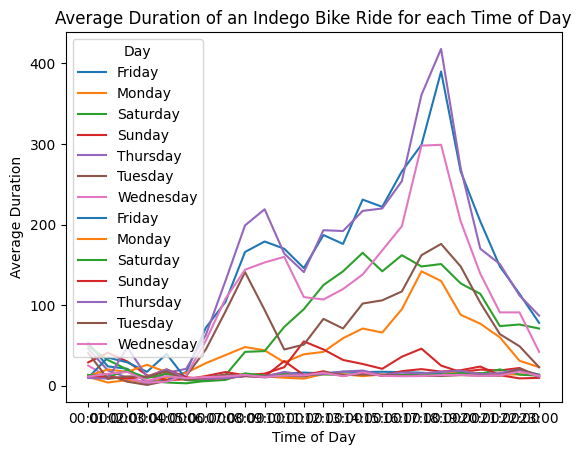

In [588]:
# Step 1a - using datetime functions, create a column called Time that has the time
# (Hour:Minute) seen in the start_time column

# HINT: The date should be of type %m/%d/%Y %H:%M, and once you've converted to datetime
# you can use the .time() function to get the time of day

import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


trips_final_df['Time'] = pd.to_datetime(trips_final_df['start_time']).dt.round('H').dt.strftime('%H:%M')

trips_final_df['Date'] = pd.to_datetime(trips_final_df['start_time']).dt.date

trips_final_df['Day'] = pd.to_datetime(trips_final_df['Date']).dt.day_name()

plot1_df = trips_final_df[['trip_id', 'Time', 'Day']]

plot1_df = plot1_df.groupby(['Day', 'Time']).size().reset_index(name='Count')

sns.lineplot(data=plot1_df, x='Time', y='Count', hue='Day', markers=True)
plt.xlabel("Time of Day")
plt.ylabel("# of Rides")
plt.title("# of Rides for each Time of Day")

plot2_df = trips_final_df[['duration', 'Time', 'Day']]

plot2_df = plot2_df.groupby(['Day', 'Time']).agg({'duration':'mean'}).reset_index()
plot2_df = plot2_df.rename(columns={'duration':'Average Duration'})

sns.lineplot(data=plot2_df, x='Time', y='Average Duration', hue='Day', markers=True)
plt.xlabel("Time of Day")
plt.ylabel("Average Duration")
plt.title("Average Duration of an Indego Bike Ride for each Time of Day")

plt.show()



In [589]:
# Step 2b- Using the 'Date' column, create a column called Day which has the day
# associated with the date (Monday, Tuesday, ..., Sunday). You can discard the
# 'Date' column once you're done.

# Hint: the .weekday() function will be helpful here, but you cannot leave the final
# answer as an integer; make sure to convert to the actual name of the day!

# Note: 0 represents Monday, 1 represents Tuesday, ... , 6 represents Sunday

# Convert 'Date' to datetime
trips_final_df['Date'] = pd.to_datetime(trips_final_df['Date'])

# Create a new column 'Day' with the day of the week
trips_final_df['Day'] = trips_final_df['Date'].dt.day_name()

# Discard the 'Date' column
trips_final_df = trips_final_df.drop(columns=['Date'])


In [590]:
# Step 3-  Make a dataframe that just contains 'trip_id','duration','Time of Day', and 'Day'

# Convert 'start_time' to datetime
trips_final_df['start_time'] = pd.to_datetime(trips_final_df['start_time'])

# Create a new column 'Time of Day' with the time part of 'start_time'
trips_final_df['Time of Day'] = trips_final_df['start_time'].dt.time


# Create a new DataFrame with only the specified columns
selected_columns_df = trips_final_df[['trip_id', 'duration', 'Time of Day', 'Day']]
selected_columns_df

,trip_id,duration,Time of Day,Day
0,536546924,3,01:50:00,Saturday
1,536546925,3,01:50:00,Saturday
2,536546927,7,01:48:00,Saturday
3,536546929,7,01:48:00,Saturday
4,536546932,6,01:41:00,Saturday
...,...,...,...,...
15250,540422839,100,21:36:00,Friday
15251,540422840,102,21:35:00,Friday
15252,540422841,102,21:34:00,Friday
15253,540422860,50,21:27:00,Friday


Your dataset is now complete! For the first line plot, you will be visualizing the number of trips that occur during each hour of the day, for all 7 days. To do so, you will be creating 2 line charts using Seaborn (sns).

### This is important: using only Matplotlib will NOT result in full credit

It is crucial that **your first line graph** contains the following features:
1. The X-axis should be labelled "Time of Day", is of type datetime and ranges from 00:00 (midnight) to 23:00 (11 pm)
2. The Y-axis should be labelled "# of Rides".
3. There should be a title called "# of Rides for each Time of Day"
4. There are 7 lines for each day of the week, clearly labeled and differentiated, **containing markers**.
5. Again, must be completed using Seaborn (sns)


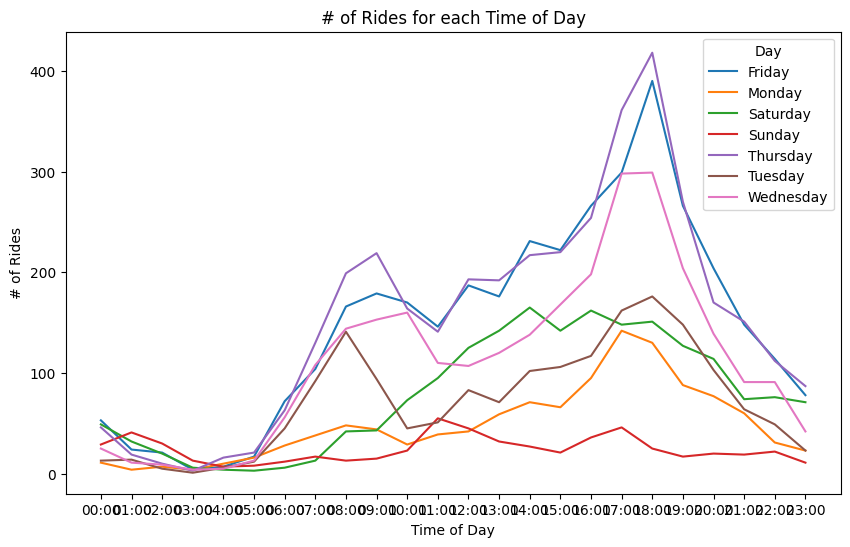

In [591]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame that does not include the 'duration' column
plot1_df = trips_final_df.drop(columns=['duration'])

# Group by 'Day' and 'Time' and count the number of rides
plot1_df = plot1_df.groupby(['Day', 'Time']).size().reset_index(name='Count')

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot1_df, x='Time', y='Count', hue='Day', markers=True)
plt.xlabel("Time of Day")
plt.ylabel("# of Rides")
plt.title("# of Rides for each Time of Day")
plt.show()


Very interesting. Now for the second line plot, you will be visualizing the average duration of a ride that occurs during each hour of the day, for all 7 days.

As a reminder, **your second line graph** should contain the following features:
1. The X-axis should be the same as last time
2. The Y-axis should be labelled "Average Duration".
3. There should be a title called "Average Duration of an Indego Bike Ride for each Time of Day"
4. There are 7 lines for each of the 7 days

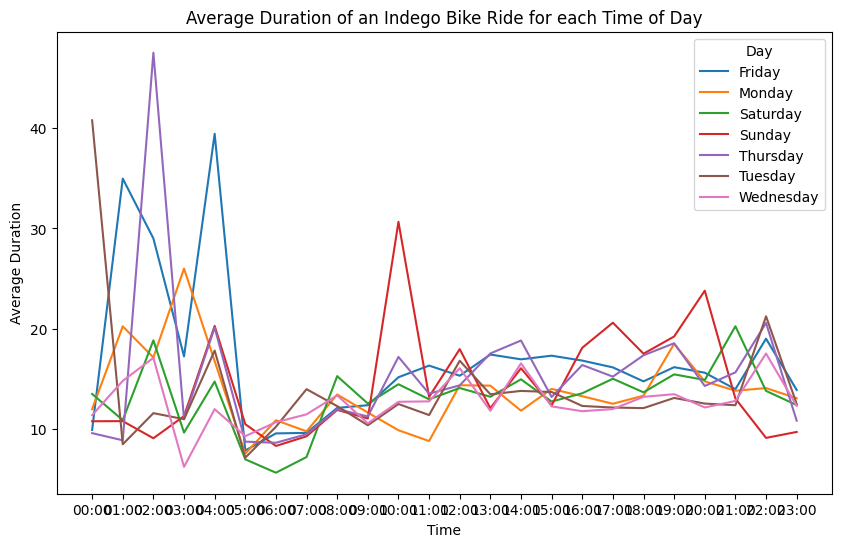

In [592]:
# For this plot, create a dataframe that does not the trip_id column
plot2_df = trips_final_df.drop(columns = ['trip_id'])

# Now, alter this dataframe to have 3 columns, IN THIS ORDER:
# 'Day', 'Time', 'duration'. Average Duration is the mean duration time
# for the particular hour of that day.
plot2_df = plot2_df.groupby(['Day', 'Time'])['duration'].mean().reset_index()
plot2_df.columns = ['Day', 'Time', 'Average Duration']

# Now just plot the graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot2_df, x='Time', y='Average Duration', hue='Day')
plt.title('Average Duration of an Indego Bike Ride for each Time of Day')
plt.ylabel('Average Duration')
plt.show()


## Part 4: Working with Text Data [9 points]

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting.

Throughout this section, we will attempt to answer the following question:

**According to the `reviews_df` dataframe, what do the reviews for some of the most popular restaurants in Philadelphia look like?**

###4.1 Tokenizing the text [2 points]

We are going to split the contents of the `reviews` column from `reviews_df` into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [593]:
# We've imported the nltk library and created the stopwords set for you
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [594]:
# TODO: tokenize and flatten
# (create a tokenized_content function that performs the steps listed above)

# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download the stopwords from nltk
nltk.download('stopwords')

# Create a set of English stopwords
stopwords = set(stopwords.words('english'))

def tokenized_content(content):
    # Tokenize the text
    tokens = word_tokenize(content)

    # Keep tokens that only contain alphabetic characters and convert each token to lowercase
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]

    return tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 **TODO**: Now perform the following tasks:
- We are interested in reviews for the **most reviewed** restaurant in `reviews_df`. Using Counter() to find this restaurant is recommended. Store the name of the restaurant in the `most_reviewed_restaurant` variable, and use it to create `restaurant_reviews_df`, a subset of `reviews_df` only containing instances from the restaurant in question
- From there, extract the `review` column of `reviews_df` as a list called `reviews`.
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`.
- Flatten the list `top_tokens_list`, and call the resultant list `top_tokens`. The autograder will be examining the contents of this list. (Flatten using list comprehension)

For futher assistance, here is the documentation for Counter() objects:

https://docs.python.org/2/library/collections.html#counter-objects

In [595]:
from collections import Counter
# TODO: find the most reviewed restaurant, use that to make restaurant_reviews_df,
#       extract the reviews, use your function to make the token list, and flatten it
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download the stopwords from nltk
nltk.download('stopwords')

# Create a set of English stopwords
stopwords = set(stopwords.words('english'))

def tokenized_content(content):
    # Tokenize the text
    tokens = word_tokenize(content)

    # Keep tokens that only contain alphabetic characters and convert each token to lowercase
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]

    return tokens

# TODO: find the most reviewed restaurant, use that to make restaurant_reviews_df,
#       extract the reviews, use your function to make the token list, and flatten it

# Find the most reviewed restaurant
most_reviewed_restaurant = reviews_df['restaurant'].value_counts().idxmax()

# Create a DataFrame with reviews of the most reviewed restaurant
restaurant_reviews_df = reviews_df[reviews_df['restaurant'] == most_reviewed_restaurant]

# Extract the reviews
reviews = restaurant_reviews_df['review']

# Use your function to make the token list
token_lists = reviews.apply(tokenized_content)

# Flatten the list of token lists into a single list of tokens
top_tokens = [token for tokens in token_lists for token in tokens]

# Count the occurrences of each token
token_counts = Counter(top_tokens)

# Get the most common tokens
top_tokens = token_counts.most_common()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [596]:
# 2 points
grader.grade(test_case_id = 'test_top_tokens', answer = top_tokens)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.



### 4.2 Most Frequent Words [2 points]
**TODO**: Now, find the 10 most common words amongst the content of `top_tokens`. Return this as a list of `(word, count)` tuples, in descending order of `count`. Store this variable in `top_ten_words`

**Hint**: We again recommend using `Counter` in this question.

In [597]:
# TODO: From top_tokens, find the ten most frequent words
# Find the ten most frequent words
top_ten_words = Counter(top_tokens).most_common(10)


In [598]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_ten_words)

You earned 0/2 points.

You seem to have the wrong tokens in the listDon't worry, you can re-submit and we will keep only your latest score.


### 4.3 Word Clouds [5 points]

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in part 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this.

*Please make sure your wordcloud has a **lavender** background color.*

We will be going through your notebooks and **manually grading** your word cloud. This is worth 5 points.

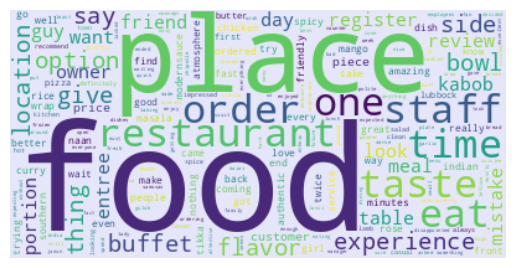

In [599]:
# Create a string with all the words
text = ' '.join(word for word, count in top_tokens)

# Create a WordCloud object
wordcloud = WordCloud(background_color='lavender').generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# HW Submission



Congratulations on finishing this homework! The good news is that similar to HW1, you basically know your score when you submit to Gradescope.
However, this time, we will be manually grading your lineplots and wordclouds, so the autograder score is not final! Remember that we will also be checking for plagiarism, so please make sure to cite your sources (if any) by commenting the urls / links you looked at.

Before you submit on Gradescope (you must submit your notebook to receive credit):

1.   Please rerun your notebook on Colab by clicking "Restart and Run-All", and make sure there is nothing wrong with your notebook.
2.   **Double check that you have the correct ID (all numbers) saved in the autograder**.
3. Make sure you've run all the Grader cells and have received a score.
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py". Please name the `.ipynb` and `.py` files **"homework2.ipynb"** and **"homework2.py"** respectively. Then, upload both the `.py` and `.ipynb` files to Gradescope.

###Be sure to name your files correctly!!!

**Please let the course staff know ASAP if you have any issues submitting.**